- 03. RAG 2단계: 데이터 기반 대화

- 3장에서는 검색 증강 생성(RAG)의 두번째 단계인 검색과 생성 과정을 다룸, 사용자 질의를 임베딩하고 벡터 저장소에서 관련 문서를 찾아 프롬프트에 컨텍스트로 제공하는 방법을 설명, 더 정확학 답변을 위한 쿼리 변환, 다양한 데이터 소스를 활용하기 위한 쿼리 라우팅, 자연어를 구조화된 쿼리로 전환하는 방법까지 실제 운영 환경에서 사용할 수 있는 고급 RAG 기법들을 다양한 코드 예시와 함께 소개

- 2장에서 데이터를 처리하고 임베딩을 생성해 벡터 저장소에 저장하는 방법을 학습, 이번 장에서는 사용자의 질의를 바탕으로 가장 연관성 높은 임베딩과 청크를 효율적으로 검색하는 방법을 설명, 이를 통해 관련 문서를 컨텍스트로 활용한 프롬프트를 구성해 LLM의 최종 출력 정확도를 향상 시킬 수 있음
- 사용자 질의를 임베딩하고 데이터 소스에서 유사 문서를 검색한 후, 이를 프롬프트에 컨텍스트로 활용하는 과정을 검색 증강 생성(RAG)이라 부름, RAG는 채팅 LLM 애플리케이션 구축에 필수적인 구성 요소로 정확하고 효율적이며 최신 정보를 제공함, 이번 장에서는 기초부터 심화까지 단계별로 안내해, 벡터 저장소와 데이터베이스 등 다영한 데이터 소스 및 구조화 비구조화 데이터를 활용한 RAG 시스템 구축 방법을 다룸, 먼저 RAG의 개념을 정립하고 그 장점을 살펴봄

- 3.1. RAG 시작하기
    - RAG는 외부 자료에서 얻은 컨텍스트를 제공해 LLM의 생성 정확도를 높이는 기법, 해당 용어는 Meta AI 연구진의 논문에서 처음 제시되었으며, RAG 기법을 적용해 훈련한 모델이 그렇지 않은 모델보다 정확도와 구체성이 뛰어나다는 것이 입증됨
    - RAG를 사용하지 않는 경우 LLM은 오직 사전 학습한 데이터를 기반으로만 작동, 이 데이터는 최신 정보를 반영하지 못할 수 있음
    - LLM의 응답은 사실이 아닐수 있으며, 시대에 뒤떨어진 정보를 담을 수 있고, 현재 기준에서 최신의 데이터가 반영이 되지 않을 수 있음
    - 이 문제를 해결하려명 LLM에 사실에 기반한 최신 정보를 제공해 정확한 응답을 하도록 유도해야 함, 위키백과의 'FIFA World Cup' 홈페이지(https://oreil.ly/LpLOV)로 접속해 소개 문단을 복사, 복사한 내용을 AI에 제출할 프롬프트에 컨텍스트로 첨부

- FIFA 남자 월드컵의 최근 우승국은 어느나라인가?
- 다음 컨텍스트를 참고하라
- FIFA 월드컵(영어: FIFA World Cup)은 축구 국제 기구인 국제 축구 연맹(FIFA)에 가맹한 축구 협회(연맹)의 축구 국가대표팀만 참가하는 국제 축구 대회이다. 
4년마다 열리는 월드컵은 1930년에 첫 대회가 열렸다. 1942년과 1946년 대회는 제2차 세계 대전으로 인하여 열리지 못했다. 대회는 예선 무대와 본선 무대 등 두 부분으로 나뉜다. 예선 무대는 본선에 진출할 32팀을 가려내기 위해 본선 보다 3년 일찍 시작한다. 현재 본선은 개최국 경기장에서 한 달 남짓 32개 팀이 우승을 놓고 경쟁하는 방식으로 진행된다. 월드컵 결승전은 세계에서 가장 많은 사람이 시청하는 단일 스포츠 경기이다. 어림잡아 7억 1,510만 명이 2006년 FIFA 월드컵 결승전을 시청했다고 한다.[1]
총 20번 대회가 열리는 동안 8팀이 우승을 차지했다. 가장 우승 횟수가 많은 팀은 브라질로 총 다섯 번의 우승컵을 들어올렸다. 그 다음으로 이탈리아와 독일이 네 번[2], 아르헨티나가 세 번[3], 그리고 초대 우승팀인 우루과이와 프랑스가 각각 두 차례씩, 잉글랜드와 스페인가 각각 한 차례씩 우승을 차지했다. 네덜란드는 준우승만 3번(1974·1978·2010)했다.대한민국은 4위가 최고 기록이다.(2002)
가장 최근에 열린 2022년 FIFA 월드컵은 카타르에서 열렸고, 아르헨티나가 우승했다.

- 마지막 문장에 LLM이 정확한 답변을 하는 데 필요한 정보가 담겨있음, 추가 컨텍스트로 최신 정보를 전달한다면 LLM은 프롬프트에 대한 정확한 응답을 생성, 그러나 관련 정보를 컨텍스트로 복사해 부텨 넣는 방식은 실제 운영하는 AI 에플리케이션에 실효성이 없고 확장성 또한 부족하다, 사용자 질문에 근거해 관련 정보를 자동으로 검색해 이를 LLM에 전달할 프롬프트의 컨텍스트로 첨부하는 자동화 시스템이 필요

- 3.1.1. 관련 문서 검색
    - AI 애플리케이션에 사용할 RAG 시스템은 세 가지 기본 단계를 거침
        - 인덱싱: 외부 데이터 소스를 전처리할 후, 데이터를 나타내는 임베딩을 손쉽게 조회하도록 벡터 저장소에 저장
        - 검색: 질문을 바탕으로 벡터 저장소에 보관된 관련 임베딩 및 데이터를 추출
        - 생성: 원래 프롬프트와 검색 증감 생성에서 활용한 관련 문서를 종합해 하나의 최종 프롬프트를 구성한 후, 이를 LLM에 전달에 예측 수행
    - 세 가지 기본 단계는 아래 그림과 같이 구성
    - 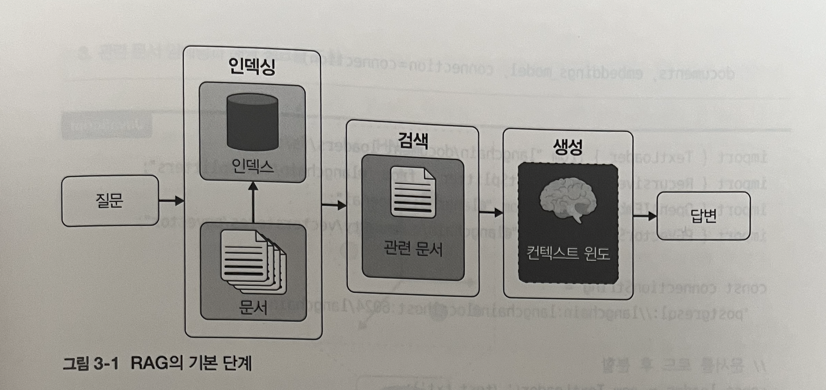
    - 인덱싱 단계는 2장에서 저세히 살펴봄, 문서 로더와 텍스트 분할기, 벡터 저장소에 대한 내용은 2장 참조, 아래 코드테서는 인덱싱 단계 진행

In [8]:
from langchain_community.document_loaders import TextLoader
from langchain.openai import OpenAIEmbeddings


ModuleNotFoundError: No module named 'langchain.openai'